In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
import collections

In [2]:
my_data = ("dataCleaned/cleaned_data.csv")

df = pd.read_csv(my_data, header=0, names=['time', 'source', 'target', 'value', 'source_type', 'target_type'])

In [3]:
df.head()

,time,source,target,value,source_type,target_type
0,2021-09-24 03:30:04+00:00,0x318072374ffa96e8867138cd05c3be282f85f405,0x11111112542d85b3ef69ae05771c2dccff4faa26,8.0,EOA,Contract
1,2021-09-24 03:30:04+00:00,0x1e7f8de390b95f960d71fbfc42f3d91021fff7ad,0xb9665650e0de599c2fafbfe98cf160399f8a23ba,14.0,EOA,EOA
2,2021-09-24 03:30:04+00:00,0x53f2736fae551c998d4e72e519f1acf474264de4,0x4dbd4fc535ac27206064b68ffcf827b0a60bab3f,7.0,EOA,Contract
3,2021-09-24 03:30:04+00:00,0x318072374ffa96e8867138cd05c3be282f85f405,0x11111112542d85b3ef69ae05771c2dccff4faa26,8.0,EOA,Contract
4,2021-09-24 03:30:04+00:00,0x9a429a5091fb9e00ec7185fa96494765d98f6d3f,0xe592427a0aece92de3edee1f18e0157c05861564,10.0,EOA,Contract


In [4]:
# Identifying the self loops
df.loc[df['source'] == df['target']]

,time,source,target,value,source_type,target_type
2994,2021-09-24 05:50:58+00:00,0x32c5f117f8722c77de8c89f98e8a2a8cea7bc1a6,0x32c5f117f8722c77de8c89f98e8a2a8cea7bc1a6,27.507501,EOA,EOA
5112,2021-09-24 07:34:39+00:00,0x1729f93e3c3c74b503b8130516984ced70bf47d9,0x1729f93e3c3c74b503b8130516984ced70bf47d9,101.000000,EOA,EOA
15967,2021-09-24 13:19:51+00:00,0xb66190f67ed8f0ca790ddfe541ee1bd0da53fe70,0xb66190f67ed8f0ca790ddfe541ee1bd0da53fe70,66.400000,EOA,EOA
16010,2021-09-24 13:21:09+00:00,0xf957fad3963fd703e63faddaf95d30fe201043a9,0xf957fad3963fd703e63faddaf95d30fe201043a9,6.950000,EOA,EOA
17090,2021-09-24 13:55:04+00:00,0x5314003b211ab223d65258015a198dec4067936b,0x5314003b211ab223d65258015a198dec4067936b,5.000000,EOA,EOA


'0x318072374ffa96e8867138cd05c3be282f85f405', '0x11111112542d85b3ef69ae05771c2dccff4faa26', 2.3019)

In [28]:
df.loc[df['source'] == '0x318072374ffa96e8867138cd05c3be282f85f405']




,time,source,target,value,source_type,target_type
0,2021-09-24 03:30:04+00:00,0x318072374ffa96e8867138cd05c3be282f85f405,0x11111112542d85b3ef69ae05771c2dccff4faa26,8.0000,EOA,Contract
3,2021-09-24 03:30:04+00:00,0x318072374ffa96e8867138cd05c3be282f85f405,0x11111112542d85b3ef69ae05771c2dccff4faa26,8.0000,EOA,Contract
87,2021-09-24 03:33:35+00:00,0x318072374ffa96e8867138cd05c3be282f85f405,0x11111112542d85b3ef69ae05771c2dccff4faa26,5.0000,EOA,Contract
121,2021-09-24 03:35:26+00:00,0x318072374ffa96e8867138cd05c3be282f85f405,0x11111112542d85b3ef69ae05771c2dccff4faa26,8.0000,EOA,Contract
205,2021-09-24 03:39:34+00:00,0x318072374ffa96e8867138cd05c3be282f85f405,0x11111112542d85b3ef69ae05771c2dccff4faa26,5.0000,EOA,Contract
291,2021-09-24 03:44:24+00:00,0x318072374ffa96e8867138cd05c3be282f85f405,0xe592427a0aece92de3edee1f18e0157c05861564,5.0000,EOA,Contract
385,2021-09-24 03:49:18+00:00,0x318072374ffa96e8867138cd05c3be282f85f405,0x11111112542d85b3ef69ae05771c2dccff4faa26,2.3019,EOA,Contract


In [5]:
# Creating the nx file

g = nx.from_pandas_edgelist(df,
                            source='source',
                            target='target',
                            edge_attr='value')

In [6]:
len(g)

12754

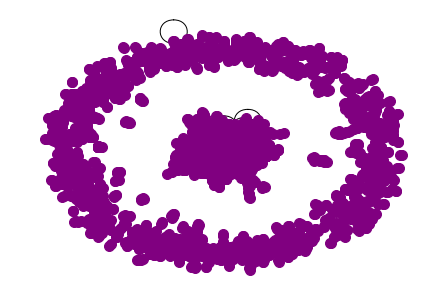

In [16]:


options = {'node_color': 'purple',
 'arrowsize': 1000,
 'node_size': 100}

nx.draw(g, **options)

Analysing the Graph

Using Simone's degree distribution graph (3.py)

In [8]:
# get degree sequence
k = sorted([d for n, d in g.degree()], reverse=True)

# get count of nodes with degree 'k = k_i'
p_k = np.unique(k, return_counts=True)

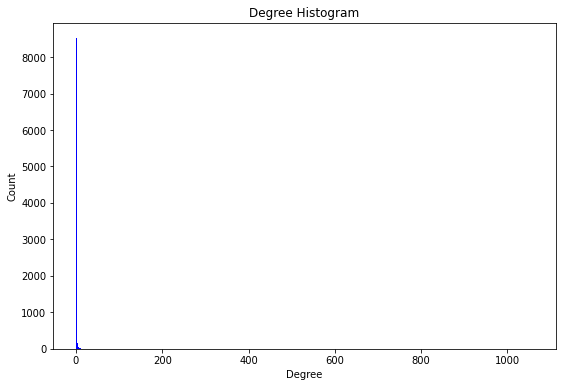

In [9]:
 #%% degree distribution plot - case A, barchart

# create figure
fig = plt.figure(figsize=(9, 6))

# create plot
ax = fig.add_subplot(1, 1, 1)

# plot data
plt.bar(p_k[0], p_k[1], width=0.9, color="b")

# transform the scale of axes
# ax.set_xscale('log')
# ax.set_yscale('log')


# aesthetics
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

# draw graph in inset
# plt.axes([0.125, 0.5, 0.3, 0.3])
# pos = nx.spring_layout(g)
# plt.axis("off")
# nx.draw_networkx_nodes(g, pos, node_size=20)
# nx.draw_networkx_edges(g, pos, alpha=0.4)
plt.show()

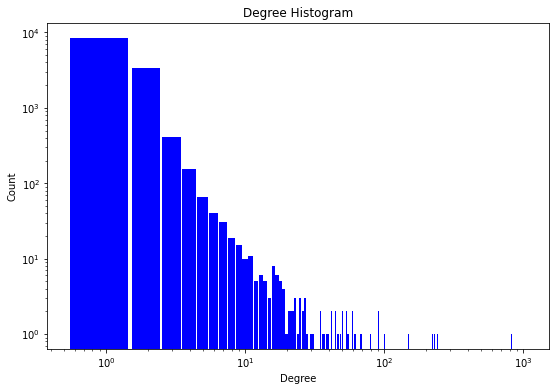

In [11]:
#%% degree distribution plot (Log Scale)

# create figure
fig = plt.figure(figsize=(9, 6))

# create plot
ax = fig.add_subplot(1, 1, 1)

# plot data
plt.bar(p_k[0], p_k[1], width=0.9, color="b")

# transform the scale of axes
ax.set_xscale('log')
ax.set_yscale('log')


# aesthetics
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

# draw graph in inset
# plt.axes([0.125, 0.5, 0.3, 0.3])
# pos = nx.spring_layout(g)
# plt.axis("off")
# nx.draw_networkx_nodes(g, pos, node_size=20)
# nx.draw_networkx_edges(g, pos, alpha=0.4)
plt.show()

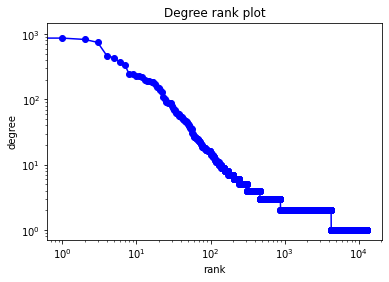

In [12]:
# degree distribution plot - case B, rank plot

# initialize a new figure and plot the data contestually
plt.loglog(k, "b-", marker="o")

# axes properties
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
# plt.axes([0.15, 0.15, 0.4, 0.4])
# Gcc = g.subgraph(sorted(nx.connected_components(g), key=len, reverse=True)[0])
# pos = nx.spring_layout(Gcc)
# plt.axis("off")
# nx.draw_networkx_nodes(Gcc, pos, node_size=20)
# nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
plt.show()

Using Simone's week2/lab.py file

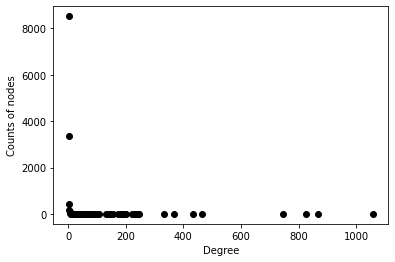

In [13]:
# %% computing the degree distribution of a network
ds = collections.Counter(k)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(ds.keys(), ds.values(), color='k')
ax.set_xlabel('Degree')
ax.set_ylabel('Counts of nodes')
plt.show()

In [14]:
# %% computing the average degree of a network
dv = dict(g.degree())
k = list(dv.values())
print("""
==============================================
    Summary stats on degree distribution
==============================================

Mu    :       {:.3f}

Min   :       {:>5}
Max   :       {:>5}


Sigma :       {:.3f}

""".format(np.mean(k), np.min(k), np.max(k), np.std(k)))



    Summary stats on degree distribution

Mu    :       2.316

Min   :           1
Max   :        1058


Sigma :       18.702




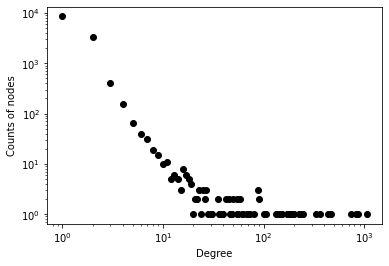

In [15]:

# %% computing the degree distribution of a network
ds = collections.Counter(k)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(ds.keys(), ds.values(), color='k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('Counts of nodes')
plt.show()




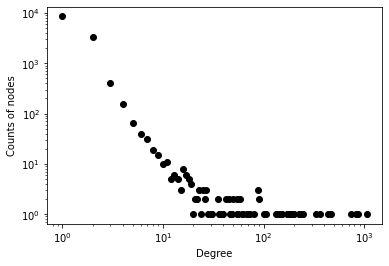

In [30]:
# assuming that degree node (dv) has been created
# Previous Function
dv = dict(g.degree())



# This one

k = list(dv.values())


# %% computing the degree distribution of a network
ds = collections.Counter(k)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(ds.keys(), ds.values(), color='k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('Counts of nodes')
plt.show()

Below- test to calculate weiight of edges

In [22]:
print(g.get_edge_data('0xe592427a0aece92de3edee1f18e0157c05861564', '0x97a50bb3339b992e406db379885b41bc817314b7'))

{'value': 402.0}


In [34]:
g.edges.data("value")

EdgeDataView([('0x318072374ffa96e8867138cd05c3be282f85f405', '0x11111112542d85b3ef69ae05771c2dccff4faa26', 2.3019), ('0x318072374ffa96e8867138cd05c3be282f85f405', '0xe592427a0aece92de3edee1f18e0157c05861564', 5.0), ('0x11111112542d85b3ef69ae05771c2dccff4faa26', '0xf3bfe0bb0dab720ea251dde573fe1d16c9145e1e', 15.0), ('0x11111112542d85b3ef69ae05771c2dccff4faa26', '0x3c3289af0f5ccdb3965b2aec0576e45334ff9f96', 2.6), ('0x11111112542d85b3ef69ae05771c2dccff4faa26', '0xcf42fee03d446739b7395c3ee18920a5d5b3e491', 3.33), ('0x11111112542d85b3ef69ae05771c2dccff4faa26', '0xed997fef3cb3c2b8f56f1116ddac349b8e73ac7f', 4.0), ('0x11111112542d85b3ef69ae05771c2dccff4faa26', '0xa31977affef20125c790e151992faac84aebde13', 3.3), ('0x11111112542d85b3ef69ae05771c2dccff4faa26', '0x0c498804369755445fd0ba755bbbdcff2d3ff34e', 88.0), ('0x11111112542d85b3ef69ae05771c2dccff4faa26', '0x3fe877b86a298326c13d911a99d59f4c9d195957', 2.5), ('0x11111112542d85b3ef69ae05771c2dccff4faa26', '0x675868c6be2c17be0a92d747f7ef0717db6ca56

In [33]:
type(g.edges.data("value"))

networkx.classes.reportviews.EdgeDataView

In [35]:
# G

#  = nx.Graph()
# G.add_edges_from(
#     [
#         (0, 1, {'weight': 1.0}),
#         (1, 2, {'weight': 2.0}),
#         (2, 0, {'weight': 1.0}),
#     ]
# )
d = nx.to_dict_of_dicts(g.edges.data("value"))
d  

# d[1][2]['weight']


AttributeError: 'EdgeDataView' object has no attribute 'adjacency'